In [46]:
# EXP_NAME="ViTDCNv3HeavyDetach_tuner_config_ML_1M"
# EXP_NAME="ViTDCNv3HeavyDim_tuner_config_iPinYou"
# EXP_NAME="ViTDCNv3HeavyDim_tuner_config_iPinYou"
EXP_NAME="ViTDCNv3HeavyDetailed_tuner_config_iPinYou"

In [47]:
import pandas as pd

try:
    backup_df = pd.read_pickle(f"{EXP_NAME}_backup.pkl")    
except:
    backup_df= pd.DataFrame()
    print("no backup config")

no backup config


In [48]:
# backup_df= pd.DataFrame()
backup_df.head()

""


In [49]:
len(backup_df)

0

In [50]:
backup_df.columns

RangeIndex(start=0, stop=0, step=1)

In [51]:
# ! pip install pyyaml
# ! pip install numpy
# ! pip install matplotlib
# ! pip install pandas

In [52]:
import yaml
with open(f'config/{EXP_NAME}/model_config.yaml', 'r') as file:
    model_configs = yaml.safe_load(file)
model_configs

{'ViTDCNv3Heavy_iPinYou_x1_001_71cb3575': {'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'ViTDCNv3Heavy',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 5,
  'num_heads': 1,
  'num_shallow_cross_layers': 4,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1,
  'vit_after_steps': 0,
  'vit_detach_

In [53]:
model_configs

{'ViTDCNv3Heavy_iPinYou_x1_001_71cb3575': {'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'ViTDCNv3Heavy',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 5,
  'num_heads': 1,
  'num_shallow_cross_layers': 4,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1,
  'vit_after_steps': 0,
  'vit_detach_

In [54]:
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import yaml

results = []
with open(f"{EXP_NAME}.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        config_key = row[2].split()[1]
        test_column = row[6]
        match = re.search(r'logloss: ([0-9.]+) - AUC: ([0-9.]+)', test_column)
        if match:
            logloss = float(match.group(1))
            auc = float(match.group(2))
            result = {'logloss': logloss, 'AUC': auc}
            try:
                if(len(backup_df)):
                    if(len(backup_df[(backup_df["logloss"] == logloss) & (backup_df["AUC"] == auc)])):
                        continue
                result.update(model_configs[config_key])
                results.append(result)
            except Exception as e:
                pass

In [55]:
results

[{'logloss': 0.005556,
  'AUC': 0.777953,
  'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'ViTDCNv3Heavy',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 5,
  'num_heads': 1,
  'num_shallow_cross_layers': 4,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1,
  'vit_after_steps': 0,
  'vit_detach

In [56]:
import pandas as pd

df = pd.DataFrame(results)
df

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,shuffle,task,use_features,verbose,vit_after_steps,vit_detach_param,vit_hidden_dim,vit_num_heads,vit_num_layers,vit_patch_size
0,0.005556,0.777953,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,3,8
1,0.005560,0.776510,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,2,8
2,0.005540,0.784005,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,2,8
3,0.005544,0.783068,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,3,8
4,0.005537,0.784334,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,2,8
5,0.005542,0.783119,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,2,8
6,0.005539,0.784285,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,3,8
7,0.005550,0.778169,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,3,8
8,0.005558,0.780601,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,3,8
9,0.005548,0.779249,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,2,8


In [57]:
df = pd.concat([df, backup_df])
df

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,shuffle,task,use_features,verbose,vit_after_steps,vit_detach_param,vit_hidden_dim,vit_num_heads,vit_num_layers,vit_patch_size
0,0.005556,0.777953,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,3,8
1,0.005560,0.776510,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,2,8
2,0.005540,0.784005,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,2,8
3,0.005544,0.783068,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,3,8
4,0.005537,0.784334,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,2,8
5,0.005542,0.783119,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,2,8
6,0.005539,0.784285,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,3,8
7,0.005550,0.778169,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,3,8
8,0.005558,0.780601,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,16,8,3,8
9,0.005548,0.779249,True,4096,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,2,8


In [58]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('string')

In [59]:
df.dropna()

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,shuffle,task,use_features,verbose,vit_after_steps,vit_detach_param,vit_hidden_dim,vit_num_heads,vit_num_layers,vit_patch_size


In [60]:
# assert False
# if(False):
#     df.to_pickle(f"{EXP_NAME}_backup.pkl")

In [61]:
metrics = ["logloss", "AUC"]
hyperparam_lst = set(df.columns) - set(metrics)
more_than_two_cols = [param for param in list(hyperparam_lst) if len(df[param].unique()) > 1 ]
more_than_two_cols

['vit_num_layers', 'vit_hidden_dim', 'num_shallow_cross_layers']

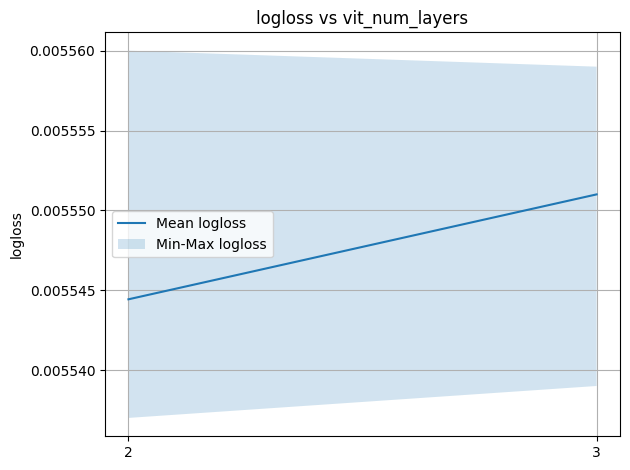

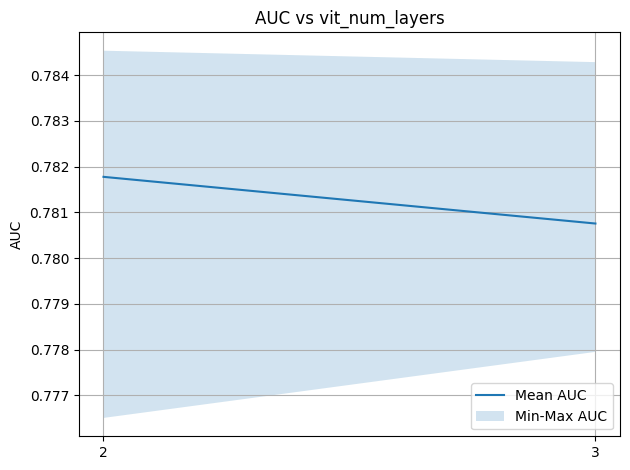

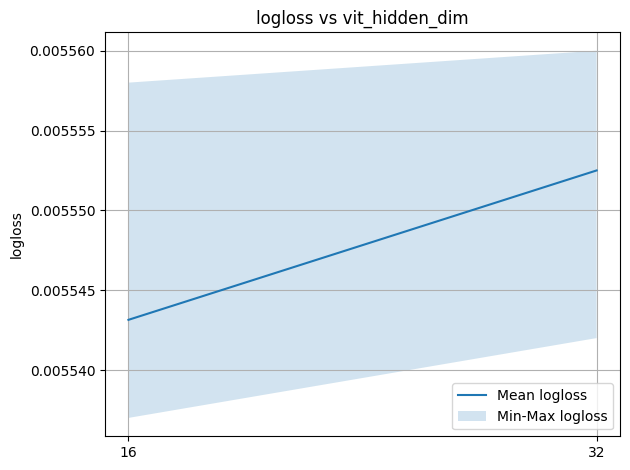

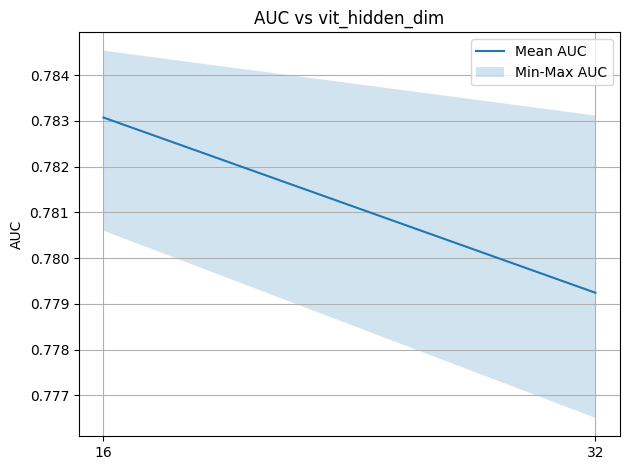

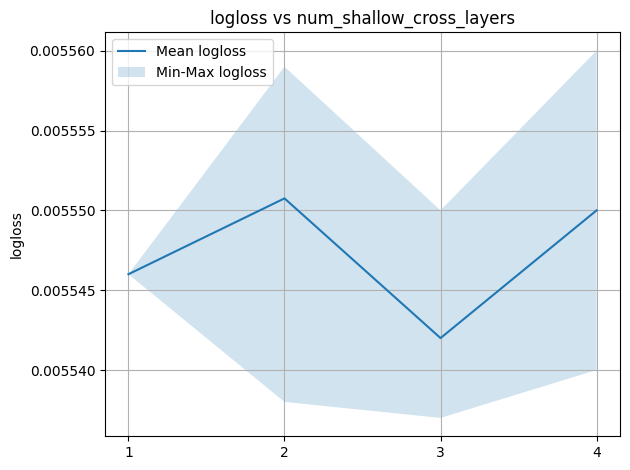

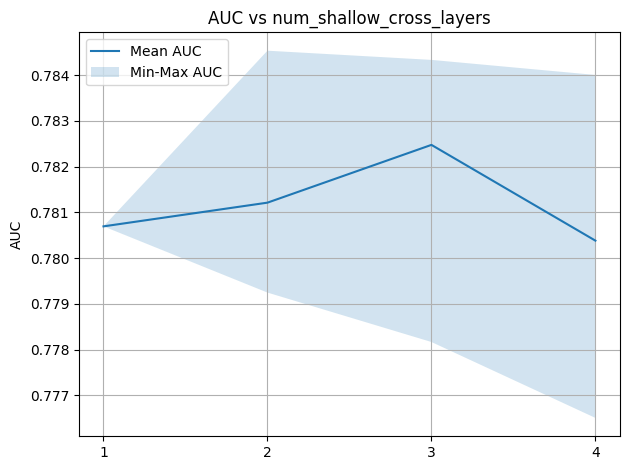

In [62]:
for param in more_than_two_cols:
    unique_values = df[param].unique()
    logloss_lst, auc_lst = [], []

    try:
        unique_values = sorted(unique_values)
    except:
        pass
    for value in unique_values:
        logloss_result = df[df[param] == value]["logloss"]
        auc_result = df[df[param] == value]["AUC"]

        logloss_lst.append([logloss_result.min(), logloss_result.mean(), logloss_result.max()])
        auc_lst.append([auc_result.min(), auc_result.mean(), auc_result.max()])
    logloss_lst = np.array(logloss_lst)
    auc_lst = np.array(auc_lst)
    metric_dict = {
        "logloss": logloss_lst,
        "AUC": auc_lst
    }
    # for metric in metrics:
    #     print(np.arange(len(metric_dict[metric])))
    #     print(metric_dict[metric][:, 1])
    for metric in metrics:
        plt.figure()
        plt.plot(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 1], label=f'Mean {metric}')
        plt.fill_between(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 0], metric_dict[metric][:, 2], alpha=0.2, label=f'Min-Max {metric}')
        plt.xticks(np.arange(len(metric_dict[metric])), unique_values)
        plt.ylabel(metric)
        plt.title(f'{metric} vs {param}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [63]:
results

[{'logloss': 0.005556,
  'AUC': 0.777953,
  'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'ViTDCNv3Heavy',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 5,
  'num_heads': 1,
  'num_shallow_cross_layers': 4,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1,
  'vit_after_steps': 0,
  'vit_detach

In [64]:
df.sort_values("logloss")[metrics+more_than_two_cols]

,logloss,AUC,vit_num_layers,vit_hidden_dim,num_shallow_cross_layers
4,0.005537,0.784334,2,16,3
10,0.005538,0.784535,2,16,2
6,0.005539,0.784285,3,16,3
2,0.005540,0.784005,2,16,4
5,0.005542,0.783119,2,32,3
3,0.005544,0.783068,3,16,4
12,0.005546,0.780696,2,16,1
9,0.005548,0.779249,2,32,2
7,0.005550,0.778169,3,32,3
0,0.005556,0.777953,3,32,4


In [65]:
df.sort_values("AUC", ascending=False)[metrics+more_than_two_cols]

,logloss,AUC,vit_num_layers,vit_hidden_dim,num_shallow_cross_layers
10,0.005538,0.784535,2,16,2
4,0.005537,0.784334,2,16,3
6,0.005539,0.784285,3,16,3
2,0.005540,0.784005,2,16,4
5,0.005542,0.783119,2,32,3
3,0.005544,0.783068,3,16,4
12,0.005546,0.780696,2,16,1
8,0.005558,0.780601,3,16,2
11,0.005559,0.780472,3,32,2
9,0.005548,0.779249,2,32,2


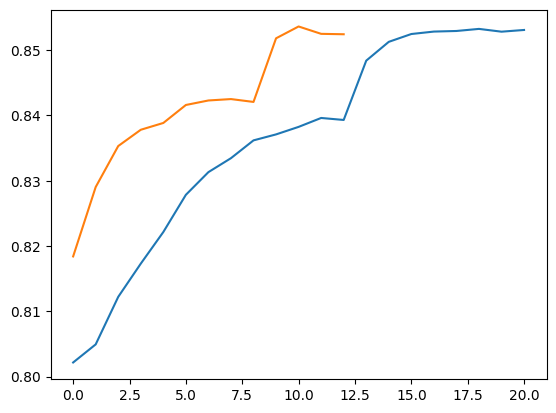

In [66]:
import matplotlib.pyplot as plt
import numpy as np

vits = [
    0.802154, 0.804925, 0.812207, 0.817295, 0.822139, 0.827837, 0.831312, 0.833450, 0.836177, 0.837092, 0.838243, 0.839610, 0.839304, 0.848389, 0.851271, 0.852469, 0.852843, 0.852934, 0.853253, 0.852827, 0.853089
]

dcnv2 = [
    0.818400, 0.829029, 0.835310, 0.837802, 0.838844, 0.841598, 0.842289, 0.842503, 0.842066, 0.851811, 0.853624, 0.852496, 0.852433
]

plt.plot(np.arange(len(vits)), vits)
plt.plot(np.arange(len(dcnv2)), dcnv2)